In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("db.csv")  # Replace with your actual filename
#print(df)
# Step 2: Encode categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])

print(df)


       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

# scallng data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

# Step 3: Normalize specified numerical columns
scaler = StandardScaler()

cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df)


       gender       age  hypertension  heart_disease  smoking_history  \
0           0  1.692704             0              1                4   
1           0  0.538006             0              0                0   
2           1 -0.616691             0              0                4   
3           0 -0.261399             0              0                1   
4           1  1.515058             1              1                1   
...       ...       ...           ...            ...              ...   
99995       0  1.692704             0              0                0   
99996       0 -1.771388             0              0                0   
99997       1  1.070944             0              0                3   
99998       0 -0.794336             0              0                4   
99999       0  0.671241             0              0                1   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
0     -0.321056     1.001706             0.047704         0  

# visualizing data

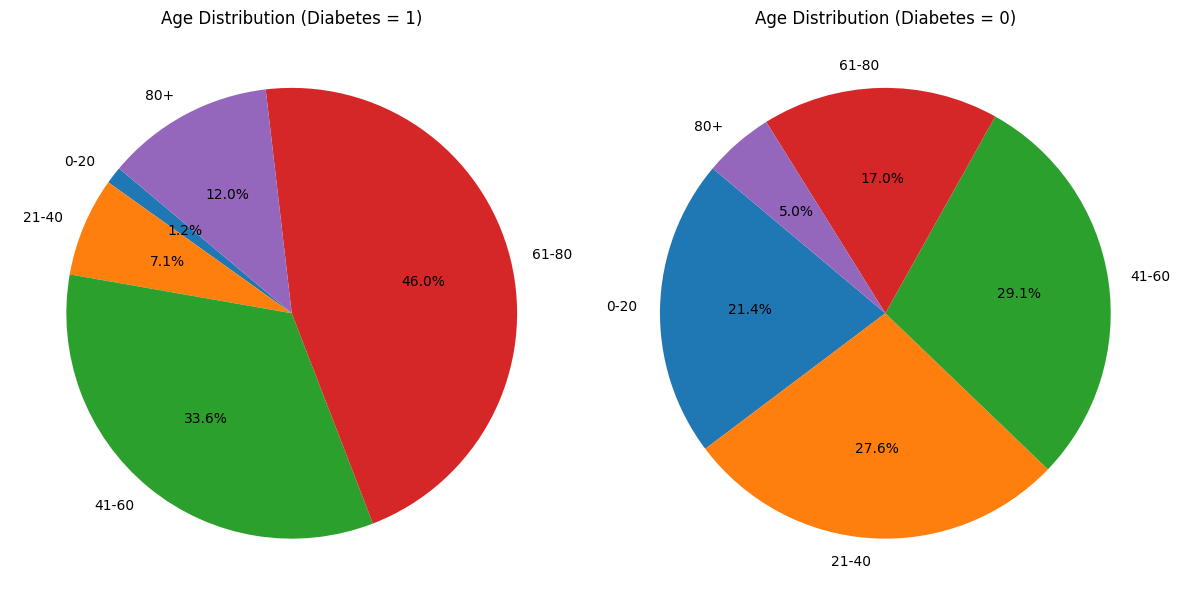

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 20, 40, 60, 80, float('inf')]
labels = ['0-20', '21-40', '41-60', '61-80', '80+']
df = pd.read_csv("db.csv")  

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_diabetic = df[df['diabetes'] == 1]['age_group'].value_counts().sort_index()
age_group_nondiabetic = df[df['diabetes'] == 0]['age_group'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Diabetic
axes[0].pie(age_group_diabetic, labels=age_group_diabetic.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Age Distribution (Diabetes = 1)')

# Non-Diabetic
axes[1].pie(age_group_nondiabetic, labels=age_group_nondiabetic.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Age Distribution (Diabetes = 0)')

plt.tight_layout()
plt.show()


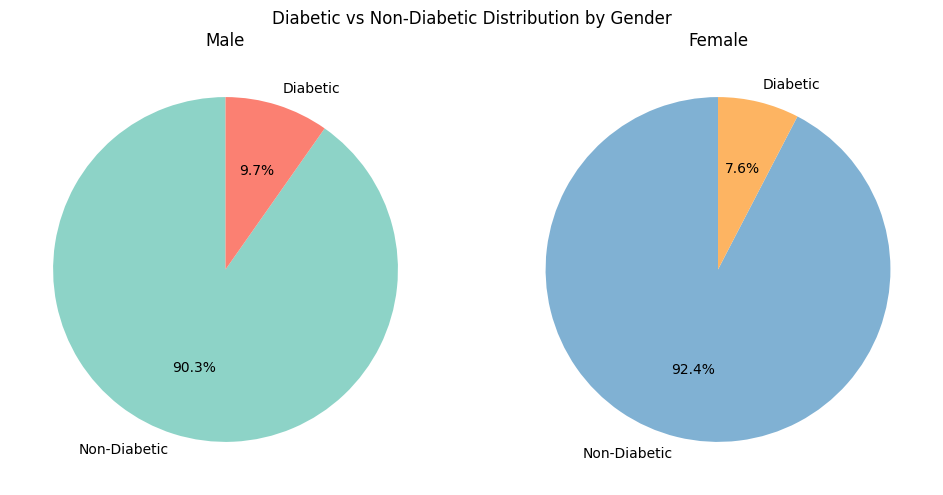

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("db.csv")  

gender_diabetes_counts = df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
labels = ['Non-Diabetic', 'Diabetic']

axs[0].pie(gender_diabetes_counts.loc['Male'], labels=labels, autopct='%1.1f%%',
           startangle=90, colors=['#8dd3c7', '#fb8072'])
axs[0].set_title('Male')

axs[1].pie(gender_diabetes_counts.loc['Female'], labels=labels, autopct='%1.1f%%',
           startangle=90, colors=['#80b1d3', '#fdb462'])
axs[1].set_title('Female')

plt.suptitle('Diabetic vs Non-Diabetic Distribution by Gender')
plt.tight_layout()
plt.show()

# observing the variance explained by each PC

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Filter rows where diabetes == 1
df_diabetic = df[df['diabetes'] == 1]

# Step 2: Select only numerical features (exclude 'diabetes')
features = df_diabetic.drop('diabetes', axis=1)

# Step 3: Apply PCA
pca = PCA()
components = pca.fit_transform(features)

# Step 4: Loadings matrix
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features.columns
)

# Step 5: Print variance explained & top contributing feature for each PC
explained_variance = pca.explained_variance_ratio_

print("Explained Variance & Top Contributing Feature per Principal Component (diabetes = 1):\n")
for i, var in enumerate(explained_variance):
    pc_name = f'PC{i+1}'
    top_feature = loadings[pc_name].abs().idxmax()
    loading_val = loadings[pc_name][top_feature]
    print(f"{pc_name}: {var:.2%} variance explained — Top feature: '{top_feature}' (loading = {loading_val:.4f})")

# Step 6: Optional — PCA result as DataFrame
pca_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(len(components[0]))])


Explained Variance & Top Contributing Feature per Principal Component (diabetes = 1):

PC1: 33.76% variance explained — Top feature: 'smoking_history' (loading = 0.9929)
PC2: 25.70% variance explained — Top feature: 'blood_glucose_level' (loading = 0.9978)
PC3: 16.15% variance explained — Top feature: 'bmi' (loading = 0.9849)
PC4: 12.52% variance explained — Top feature: 'HbA1c_level' (loading = 0.9981)
PC5: 5.12% variance explained — Top feature: 'age' (loading = 0.9695)
PC6: 3.07% variance explained — Top feature: 'gender' (loading = 0.9914)
PC7: 2.23% variance explained — Top feature: 'hypertension' (loading = 0.9897)
PC8: 1.45% variance explained — Top feature: 'heart_disease' (loading = 0.9803)


## 1. Random Forest without Sampling (Baseline Model)

### Goal
Establish a baseline performance using the original class distribution of the dataset.

### Method
- Use `RandomForestClassifier` with `class_weight='balanced'` to address class imbalance.
- No oversampling or undersampling applied to the training data.



In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA and retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Train/Test split (on imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train the Random Forest model (with class_weight to help imbalance slightly)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.91      0.65      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.94      0.82      0.87     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:

[[18189   111]
 [  594  1106]]


## 2. Random Forest with SMOTE (Oversampling)

### Goal
Improve recall for the minority class using synthetic oversampling.

### Method
- Apply **SMOTE** (Synthetic Minority Oversampling Technique) **only to the training data**, after PCA transformation.
- Use `RandomForestClassifier` with `class_weight='balanced'` to maintain sensitivity to class imbalance.
- The test set remains untouched (no oversampling) to simulate real-world performance.


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Separate features & target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA with only 6 components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Train/Test Split BEFORE applying SMOTE
X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_orig, y_train_orig)

# Step 6: Train the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate on the original test set
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     18300
           1       0.62      0.78      0.69      1700

    accuracy                           0.94     20000
   macro avg       0.80      0.87      0.83     20000
weighted avg       0.95      0.94      0.94     20000

Confusion Matrix:

[[17475   825]
 [  374  1326]]


## 3. Multiple Classifier Ensemble with Undersampling

### Goal
Explore and compare different classifiers using ensemble learning to improve robustness and generalization.

### Undersampling Strategy
- Perform **10 iterations** of undersampling.
- In each iteration, randomly sample the majority class to match **3.5×** the minority class count.
- Combine with the full minority class to create a balanced training set.

### Models Used
- Logistic Regression
- Random Forest
- Gradient Boosting
- AdaBoost
- Support Vector Machine (SVM)
- Naive Bayes
- k-Nearest Neighbors (KNN)
- Decision Tree
- XGBoost

### Training
- Each model is trained **independently** on each of the 10 balanced samples.
- Models are grouped into **per-type ensembles** (e.g., 10 Random Forests, 10 SVMs, etc.).


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from collections import defaultdict

# Load and preprocess dataset
df = pd.read_csv("db.csv")

# Encode categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])

# Normalize numerical columns
scaler = StandardScaler()
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# Prepare DataFrame for balanced undersampling
pca_df = pd.DataFrame(X_train_full, columns=[f'PC{i+1}' for i in range(6)])
pca_df['diabetes'] = y_train_full.reset_index(drop=True)

# Count classes
count_1 = int(sum(pca_df['diabetes'] == 1) * 3)
count_0 = sum(pca_df['diabetes'] == 0)
print(f"Minority x3 = {count_1}, Majority = {count_0}")

# Define models
def get_models(y_train):
    imbalance_ratio = (len(y_train) - sum(y_train)) / sum(y_train)
    return {
        "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
        "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Support Vector Machine": SVC(probability=True, class_weight='balanced', random_state=42),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                 scale_pos_weight=imbalance_ratio, random_state=42)
    }

# Train models with ensemble undersampling
n_iterations = 10
model_ensembles = defaultdict(list)

for i in range(n_iterations):
    # Undersample majority class
    df_1 = pca_df[pca_df['diabetes'] == 1]
    df_0 = pca_df[pca_df['diabetes'] == 0].sample(n=count_1, random_state=i)
    df_balanced = pd.concat([df_1, df_0]).sample(frac=1, random_state=i).reset_index(drop=True)
    
    X_train = df_balanced.drop('diabetes', axis=1)
    y_train = df_balanced['diabetes']
    
    models = get_models(y_train)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_ensembles[name].append(model)

# Evaluation function
def evaluate_ensemble(models, X_eval, y_eval, model_name):
    proba_preds = np.zeros((X_eval.shape[0], 2))
    for model in models:
        proba_preds += model.predict_proba(X_eval)
    proba_preds /= len(models)
    y_pred = np.argmax(proba_preds, axis=1)

    report = classification_report(y_eval, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_eval, y_pred)

    print(f"\n[{model_name.upper()}] Ensemble Model - Classification Report:")
    for label in ['0', '1']:
        precision = report[label]['precision']
        recall = report[label]['recall']
        f1 = report[label]['f1-score']
        support = report[label]['support']
        print(f"Class {label} - Precision: {precision:.2f}, Recall: {recall:.2f}, "
              f"F1-score: {f1:.2f}, Support: {int(support)}")
    print(f"Accuracy: {report['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Evaluate all models
for model_name, model_list in model_ensembles.items():
    evaluate_ensemble(model_list, X_test, y_test, model_name)


Minority x3 = 20400, Majority = 73200


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\iamha\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:51:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\iamha\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:52:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-


[LOGISTIC REGRESSION] Ensemble Model - Classification Report:
Class 0 - Precision: 0.99, Recall: 0.88, F1-score: 0.93, Support: 18300
Class 1 - Precision: 0.41, Recall: 0.89, F1-score: 0.56, Support: 1700
Accuracy: 0.88
Confusion Matrix:
[[16152  2148]
 [  190  1510]]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


[RANDOM FOREST] Ensemble Model - Classification Report:
Class 0 - Precision: 0.98, Recall: 0.97, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.69, Recall: 0.78, F1-score: 0.73, Support: 1700
Accuracy: 0.95
Confusion Matrix:
[[17700   600]
 [  376  1324]]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib


[GRADIENT BOOSTING] Ensemble Model - Classification Report:
Class 0 - Precision: 0.98, Recall: 0.96, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.67, Recall: 0.78, F1-score: 0.72, Support: 1700
Accuracy: 0.95
Confusion Matrix:
[[17659   641]
 [  377  1323]]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with featu


[SUPPORT VECTOR MACHINE] Ensemble Model - Classification Report:
Class 0 - Precision: 0.98, Recall: 0.94, F1-score: 0.96, Support: 18300
Class 1 - Precision: 0.56, Recall: 0.83, F1-score: 0.67, Support: 1700
Accuracy: 0.93
Confusion Matrix:
[[17212  1088]
 [  296  1404]]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py


[K-NEAREST NEIGHBORS] Ensemble Model - Classification Report:
Class 0 - Precision: 0.98, Recall: 0.96, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.64, Recall: 0.77, F1-score: 0.70, Support: 1700
Accuracy: 0.94
Confusion Matrix:
[[17574   726]
 [  396  1304]]

[NAIVE BAYES] Ensemble Model - Classification Report:
Class 0 - Precision: 0.97, Recall: 0.98, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.73, Recall: 0.68, F1-score: 0.70, Support: 1700
Accuracy: 0.95
Confusion Matrix:
[[17866   434]
 [  547  1153]]

[DECISION TREE] Ensemble Model - Classification Report:
Class 0 - Precision: 0.98, Recall: 0.96, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.65, Recall: 0.76, F1-score: 0.70, Support: 1700
Accuracy: 0.94
Confusion Matrix:
[[17606   694]
 [  407  1293]]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature n


[ADABOOST] Ensemble Model - Classification Report:
Class 0 - Precision: 0.98, Recall: 0.96, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.62, Recall: 0.78, F1-score: 0.69, Support: 1700
Accuracy: 0.94
Confusion Matrix:
[[17478   822]
 [  379  1321]]

[XGBOOST] Ensemble Model - Classification Report:
Class 0 - Precision: 0.99, Recall: 0.92, F1-score: 0.95, Support: 18300
Class 1 - Precision: 0.50, Recall: 0.88, F1-score: 0.64, Support: 1700
Accuracy: 0.91
Confusion Matrix:
[[16791  1509]
 [  201  1499]]


## Random Forest with Varying Undersampling Ratios

### Goal
Investigate how different class balance ratios affect the performance of a Random Forest classifier.

### Ratios Tested
- Ratios range from **1.0× to 6.5×** in **0.5 increments**, relative to the minority class count.

### Method
- For each ratio:
  - Run **10 iterations** of undersampling the majority class.
  - In each iteration, sample the majority class to match the specified ratio × minority class count.
  - Combine with the full minority class to form a balanced subset.
  - Train a `RandomForestClassifier(class_weight='balanced')` on each subset.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess dataset
df = pd.read_csv("db.csv")

# Encode categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])

# Normalize numerical columns
scaler = StandardScaler()
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# Prepare DataFrame for balanced undersampling
pca_df = pd.DataFrame(X_train_full, columns=[f'PC{i+1}' for i in range(6)])
pca_df['diabetes'] = y_train_full.reset_index(drop=True)

# Count original class distributions
total_pos = sum(pca_df['diabetes'] == 1)
total_neg = sum(pca_df['diabetes'] == 0)

# Loop over different ratios
ratios = np.arange(1.0, 6.5, 0.5)  # From 1.0 to 6.0 in 0.5 steps

for ratio in ratios:
    count_1 = int(total_pos * ratio)
    print(f"\n====== Ratio: {ratio:.1f} (Using {count_1} majority class samples) ======")
    
    n_iterations = 10
    models = []

    for i in range(n_iterations):
        df_1 = pca_df[pca_df['diabetes'] == 1]
        df_0 = pca_df[pca_df['diabetes'] == 0].sample(n=count_1, random_state=i)
        df_balanced = pd.concat([df_1, df_0]).sample(frac=1, random_state=i).reset_index(drop=True)

        X_train = df_balanced.drop('diabetes', axis=1)
        y_train = df_balanced['diabetes']

        model = RandomForestClassifier(class_weight='balanced', random_state=42)
        model.fit(X_train, y_train)
        models.append(model)

    # Ensemble prediction
    proba_preds = np.zeros((X_test.shape[0], 2))
    for model in models:
        proba_preds += model.predict_proba(X_test)

    proba_preds /= n_iterations
    y_pred = np.argmax(proba_preds, axis=1)

    # Evaluation
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("\nClassification Report:")
    for label in ['0', '1']:
        precision = report[label]['precision']
        recall = report[label]['recall']
        f1 = report[label]['f1-score']
        support = report[label]['support']
        print(f"Class {label} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Support: {int(support)}")

    print(f"Accuracy: {report['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)



====== Ratio: 1.0 (Using 6800 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.99, Recall: 0.89, F1-score: 0.94, Support: 18300
Class 1 - Precision: 0.44, Recall: 0.92, F1-score: 0.59, Support: 1700
Accuracy: 0.89
Confusion Matrix:
[[16286  2014]
 [  140  1560]]

====== Ratio: 1.5 (Using 10200 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.99, Recall: 0.93, F1-score: 0.96, Support: 18300
Class 1 - Precision: 0.52, Recall: 0.87, F1-score: 0.65, Support: 1700
Accuracy: 0.92
Confusion Matrix:
[[16961  1339]
 [  229  1471]]

====== Ratio: 2.0 (Using 13600 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.98, Recall: 0.95, F1-score: 0.96, Support: 18300
Class 1 - Precision: 0.58, Recall: 0.82, F1-score: 0.68, Support: 1700
Accuracy: 0.94
Confusion Matrix:
[[17304   996]
 [  301  1399]]

====== Ratio: 2.5 (Using 17000 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.98, Recall: 0.96, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.64, Recall: 0.79, F1-score: 0.71, Support: 1700
Accuracy: 0.94
Confusion Matrix:
[[17529   771]
 [  351  1349]]

====== Ratio: 3.0 (Using 20400 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.98, Recall: 0.97, F1-score: 0.97, Support: 18300
Class 1 - Precision: 0.69, Recall: 0.78, F1-score: 0.73, Support: 1700
Accuracy: 0.95
Confusion Matrix:
[[17700   600]
 [  376  1324]]

====== Ratio: 3.5 (Using 23800 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.98, Recall: 0.97, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.73, Recall: 0.76, F1-score: 0.74, Support: 1700
Accuracy: 0.96
Confusion Matrix:
[[17828   472]
 [  415  1285]]

====== Ratio: 4.0 (Using 27200 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.98, Recall: 0.98, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.76, Recall: 0.74, F1-score: 0.75, Support: 1700
Accuracy: 0.96
Confusion Matrix:
[[17902   398]
 [  441  1259]]

====== Ratio: 4.5 (Using 30600 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.97, Recall: 0.98, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.79, Recall: 0.73, F1-score: 0.76, Support: 1700
Accuracy: 0.96
Confusion Matrix:
[[17974   326]
 [  462  1238]]

====== Ratio: 5.0 (Using 34000 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.97, Recall: 0.98, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.81, Recall: 0.71, F1-score: 0.76, Support: 1700
Accuracy: 0.96
Confusion Matrix:
[[18023   277]
 [  489  1211]]

====== Ratio: 5.5 (Using 37400 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.97, Recall: 0.99, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.84, Recall: 0.71, F1-score: 0.77, Support: 1700
Accuracy: 0.96
Confusion Matrix:
[[18068   232]
 [  500  1200]]

====== Ratio: 6.0 (Using 40800 majority class samples) ======


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Classification Report:
Class 0 - Precision: 0.97, Recall: 0.99, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.86, Recall: 0.70, F1-score: 0.77, Support: 1700
Accuracy: 0.96
Confusion Matrix:
[[18102   198]
 [  517  1183]]


## Random Forest with Fixed Undersampling Ratio (3.5×)

### Goal
Train a Random Forest ensemble using a mid-range fixed imbalance ratio (3.5×) to evaluate its effectiveness in handling class imbalance.

### Strategy
- **Undersample the majority class** to **3.5×** the size of the minority class.
- Perform **10 iterations** of undersampling with different random seeds.
- In each iteration:
  - Combine the full minority class with the undersampled majority class.
  - Train a `RandomForestClassifier` with `class_weight='balanced'`

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess dataset
df = pd.read_csv("db.csv")

# Encode categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])

# Normalize numerical columns
scaler = StandardScaler()
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# Prepare DataFrame for balanced undersampling
pca_df = pd.DataFrame(X_train_full, columns=[f'PC{i+1}' for i in range(6)])
pca_df['diabetes'] = y_train_full.reset_index(drop=True)

# Count classes
count_1 = int(sum(pca_df['diabetes'] == 1) * 3.5)
count_0 = sum(pca_df['diabetes'] == 0)
print(count_1, count_0)

n_iterations = 10
models = []

for i in range(n_iterations):
    # Undersample majority class
    df_1 = pca_df[pca_df['diabetes'] == 1]
    df_0 = pca_df[pca_df['diabetes'] == 0].sample(n=count_1, random_state=i)
    df_balanced = pd.concat([df_1, df_0]).sample(frac=1, random_state=i).reset_index(drop=True)

    X_train = df_balanced.drop('diabetes', axis=1)
    y_train = df_balanced['diabetes']

    # Train Random Forest model
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    models.append(model)

# Ensemble prediction: average probabilities
proba_preds = np.zeros((X_test.shape[0], 2))
for model in models:
    proba_preds += model.predict_proba(X_test)

# Average predictions
proba_preds /= n_iterations
y_pred = np.argmax(proba_preds, axis=1)

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nEnsemble Model - Classification Report:\n")
for label in ['0', '1']:
    precision = report[label]['precision']
    recall = report[label]['recall']
    f1 = report[label]['f1-score']
    support = report[label]['support']
    print(f"Class {label} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Support: {int(support)}")

print(f"\nAccuracy: {report['accuracy']:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)


23800 73200


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklea


Ensemble Model - Classification Report:

Class 0 - Precision: 0.98, Recall: 0.97, F1-score: 0.98, Support: 18300
Class 1 - Precision: 0.73, Recall: 0.76, F1-score: 0.74, Support: 1700

Accuracy: 0.96

Confusion Matrix:

[[17828   472]
 [  415  1285]]
